### random

In [50]:
from numpy import random
#隨機產生10000筆數字，平均數100，標準差5
df = random.normal(loc=100, scale=5, size=(10000))

# 產生常態分布亂數（平均值 = 0，標準差 = 1）
x = random.gauss(mu=0, sigma=1)
print(x)

# 產生 10000 個常態分布亂數
nums = []
for i in range(10000):
    x = random.gauss(mu=0, sigma=1)
    nums.append(x)

# 產生指數分布亂數（平均值 = 1/5）
x = random.expovariate(lambd=5)
print(x)

### 階乘

In [1]:
from math import factorial
print ("Factorial is", factorial(5))

Factorial is 120


### lambda

In [2]:
multiply = lambda x,y:x*y
print(multiply(4,2))

8


### file write&open

In [ ]:
f = open('hihi.txt','r')#text file open
f.write()
f.close()

### lambda
#### filter(lambda parameter: expression, iterable)

In [29]:
x= 32
numbers = [2,50,67,88,93]
# if else
abs_number = (lambda x : x if x >= 0 else -x)(x)
#abs_number = (lambda x : x if x >= 0 else -x)
print(abs_number)
#print(abs_number(x))

# filter
result = filter(lambda x:x>10,numbers)
print(list(result))

# map(用在多個數，串列裡)
result = map(lambda x:x*2, numbers)
print(list(result))

# reduce會將後面的疊代對象，逐項將iterable的每個元素 利用function進行運算，簡化後回傳一個數值或答案


32
[50, 67, 88, 93]
[4, 100, 134, 176, 186]


In [28]:
from functools import reduce
result = reduce(lambda x,y: x if x>y else y,numbers)
print(result)
result = reduce(lambda x,y: x+y,numbers)
print(result)

93
300


In [12]:
cars = [ 
    ('toyota','3000'),
    ('tloyota','1000'),
    ('ltoyota','5000')
]
print(sorted(cars, key=lambda car:car[1]))

[('tloyota', '1000'), ('toyota', '3000'), ('ltoyota', '5000')]


## numpy

In [30]:
import numpy as np
data = [np.random.standard_normal() for i in range(7)]

# 資料前處理

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 查看前五筆資料
df.head()
df.tail()
# 查看欄位名稱，欄位的資料型態
df.info()
#分佈情形
df.describe()
#幾筆資料
len(df)

In [ ]:
# read csv file
df1 = pd.read_csv('./AQI_CSV/AQI-2023-01.csv')
# make it as a csv file
df.to_csv(f"AQI.csv")

In [36]:
obj2 = pd.Series([2,-1,9,90,8],index=['d','a','b','r','w'])
result = obj2[obj2 > 0]
print(result)
# 自然指數
np.exp(obj2)

d     2
b     9
r    90
w     8
dtype: int64


d    7.389056e+00
a    3.678794e-01
b    8.103084e+03
r    1.220403e+39
w    2.980958e+03
dtype: float64

In [53]:
import pandas as pd
df = pd.read_csv("../作業/hw/0050.csv")
df = pd.DataFrame(df)

### train test split

In [ ]:
from sklearn.model_selection import train_test_split
#2 並把 df 隨機為分為 8:2 的兩個 DataFrame，並命名為 train_df 和 test_df，train_df 為8，test_df 為 2。
train_df, test_df = train_test_split(df, random_state=777, train_size=0.8)

### index

In [46]:
# 重設索引值
x = df.reindex(index=df.Date)
df = df.set_index('"siteid"')
# 刪除某列
df.drop(index=["Colorado", "Ohio"])
# 刪除某欄
y = x.drop(columns=['Date'])
y = x.drop(['Date'],axis=1)
# 只留某幾欄且按照順序
df=df.reindex(['"sitename"','"aqi"', '"pm2.5_avg"', '"pm10_avg"','"so2_avg"','"datacreationdate"'],axis=1)
#只留某幾欄
new_df = df.filter(items=['new_cases', 'new_deaths','population_density'])

### 更換欄位名稱

In [54]:
#更換名稱為value,**一定要是dataframe才能更換
df = pd.DataFrame(df)
df = df.rename(columns={'Date':'date'})

### 日期

In [ ]:
# 將日期的十分秒去除只留年月日
df['"date"']=pd.to_datetime(df['"datacreationdate"']).dt.normalize()
# 更改日期格式
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].dt.strftime('%Y-%m')
df['date']

### 處理空值

In [ ]:
del(df['"unit"'])
#處理空值, fill in 0
df = df.fillna(0)
#drop it
df.dropna()

### normalize

In [ ]:
#standardizing new_cases & new_deaths
df_new['new_cases'] = preprocessing.scale(df_new['new_cases']) 
df_new['new_deaths'] = preprocessing.scale(df_new['new_deaths']) 

### z-score, mean, std

In [ ]:
#將df2每個值都轉換為z-score
df3 = df2.apply(zscore)
#算出每行的平均跟標準差
avg_list=list(np.mean(df3, axis=0))
std_list=list(np.std(df3, axis=0))

### 資料欄位值的篩選

In [56]:
# 就單個資料欄位的值篩選
df1 = df[df['"county"']=='高雄市']
df1 = df[df['Open']>48]
# 就多個資料欄位的值篩選
df2 = df[df['Open'] > df['Close']]
# sorted
tmp = df1.sort_values(['Amount'],ascending=[False])
tmp = df1.sort_values(['Amount'],ascending=[False]).to_numpy()
#找出四分位數
IQR = np.percentile(df['Open'],75) - np.percentile(df['Open'],25)

### groupby

In [ ]:
# 用多個欄位groupby然後取其中一個欄位做平均
df = df.groupby(['"sitename"','"datacreationdate"'],as_index=False).mean('"aqi"')
# 用一個欄位groupby再取各個欄位要取的值，多欄位要取總和或平均要用agg
a=df.groupby(['date']).agg({"new_cases":"sum","new_deaths":"sum"})

## transpose

In [ ]:
frame3.T

### ndarry or df

In [ ]:
frame3.to_numpy()
pd.DataFrame(frame3)
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),index=["a", "c", "d"],columns=["Ohio", "Texas", "California"])

## predict

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt

### 字體

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['BiauKai']
# 上面這兩句有設應該就行了

In [ ]:
#設置圖表大小及顏色
fig=plt.figure(figsize=(24,8), dpi=100, facecolor="white",edgecolor="green")
#標題
plt.title("0050 股票統計圖表",{"size":20,"color":"black"})
#關掉plt的刻度
plt.axis("off")
#新增兩個子圖
ax = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
#兩個子圖間不要有間隔
plt.subplots_adjust(hspace=0)

In [ ]:
#主刻度為天，間隔90天
ax2.set_xticks(pd.date_range(date[0],date[-1],freq='90D'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
ax2.tick_params(which='major',axis='x',labelrotation=0,labelsize=6.5,length=5,pad=10)

In [ ]:
#將上方子圖的折線分別畫出
ax.plot(date,five_sma, color="blue", label=fsma+'5日均線',markerfacecolor='red',markersize=6)
ax.plot(date,twenty_sma, color='purple', label=tsma+'20日均線',markerfacecolor='#121466',markersize=6)
ax.plot(date,sixty_sma, color='green', label=ssma+'60日均線',markerfacecolor='#121466',markersize=6)
#將下方的子圖用長條圖畫出，超過平均為綠色，低於平均為紅色（amount)
ax2.bar(df.Date, df.Amount,color=['green'if val-df.Amount.mean()>0 else 'red' for val in df.Amount])
#lengend標籤位置，1為右上角
ax.legend(loc=1)
plt.show()

In [ ]:
#設定子圖的標題以及x,y軸的標籤
ax.set_title("temperature")
ax.set_xlabel("month")
ax.set_ylabel("temperature(℃)")

#設定子圖的標題以及x,y軸的標籤
ax2.set_title("precipitation")
ax2.set_xlabel("month")
ax2.set_ylabel("precipitation(mm)")

In [ ]:
#畫出甜甜圈圖,調整wedgeprops裡的width參數，使得圓餅圖中有可以有個洞，以畫出甜甜圈的樣子
plt.pie(f_df["降水量(mm)"], labels=f_df.index,autopct='%.1f%%',textprops={'color':'black','size':10},pctdistance=0.7,radius=1.5, wedgeprops={'linewidth':1, 'edgecolor':'w','width':1})
plt.show()

### 箱型圖
透過 boxplot 來查看特徵 x 在 3143 筆資料中的分布狀況，我們可以看出平均值約 0.8，最大值接近 1，最小值接近 0。其中值大多介於0.6~1之間，其大的數目屬於零星的數量。

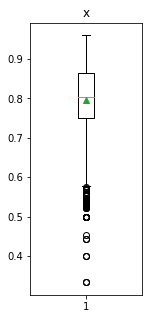

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(data['x'],showmeans=True)
plt.title('x')
plt.show()

## 離群值處理
這裡提供兩種常見的方法來對資料進行處理，第一個是將左偏的資料取平方。第二種是透過分位數來移除離群值。


### 方法1: 特徵取平方
因為資料型態`左偏`，因此我們可以透過取平方來將資料拉回使為更集中。

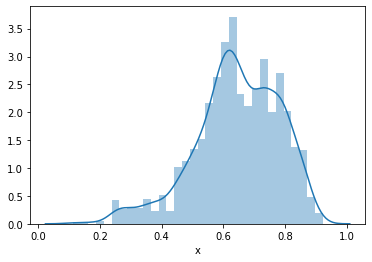

In [ ]:
exp_data = np.power(data['x'], 2)
exp_data = exp_data.replace([np.inf, -np.inf, -0], 0)
sns.distplot(exp_data)
plt.show()

In [ ]:
print("偏態(Skewness): {:.2f}".format(exp_data.skew()))

### 方法二: 移除離群值

In [ ]:
# 將所有特徵超出1.5倍標準差的概念將這些Outlier先去掉，避免對Model造成影響
print ("Shape Of The Before Ouliers: ",data.shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(data['x'],75) - np.percentile(data['x'],25)
#outlier = Q3 + n*IQR 
data=data[data['x'] < np.percentile(data['x'],75)+n*IQR]
#outlier = Q1 - n*IQR 
data=data[data['x'] > np.percentile(data['x'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",data.shape)

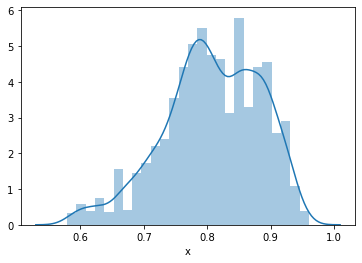

In [ ]:
import seaborn as sns
sns.distplot(data['x'])
plt.show()

In [ ]:
print("偏態(Skewness): {:.2f}".format(data['x'].skew()))

In [2]:
import numpy as np
import random
samples = np.random.standard_normal(size=(4, 4))
samples
random.normalvariate(100,10)

array([[-1.15411958, -0.20991663,  1.39933262,  0.86543111],
       [-1.31054838, -0.64274742,  0.40313711, -0.81773239],
       [-1.10418883, -0.97117887, -0.3150389 , -0.28084658],
       [ 0.62466624, -0.94947534, -0.13647689,  0.98363192]])

### 折線圖

In [ ]:
# 設置Thailand Monthly Average Cases圖
plt.plot(monthly_avg_case)
plt.title('Thailand Monthly Average Cases')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.show()

# tkinter

In [8]:
import tkinter as tk

## label


In [7]:
root = tk.Tk()
root.title('hello world')
root.geometry('200x150')

mylabel = tk.Label(root, text='hello world', font=('Arial', 18))
mylabel.pack()


root.mainloop()

## button


In [9]:
root = tk.Tk()
root.title('my window')
root.geometry('200x150')

def button_event():
    mybutton['text'] = 'hello world'

mybutton = tk.Button(root, text='button', command=button_event)
mybutton.pack()

root.mainloop()

## entry

In [10]:
root = tk.Tk()
root.title('my window')

mylabel = tk.Label(root, text='Name:')
mylabel.grid(row=0, column=0)
myentry = tk.Entry(root)
myentry.grid(row=0, column=1)

mylabel2 = tk.Label(root, text='Password:')
mylabel2.grid(row=1, column=0)
myentry2 = tk.Entry(root, show='*')
myentry2.grid(row=1, column=1)

mybutton = tk.Button(root, text='Login')
mybutton.grid(row=2, column=1)

root.mainloop()

## 下拉式選單

In [12]:
import tkinter.ttk as ttk
 
root = tk.Tk()
root.title('my window')
root.geometry('200x150')

mycombobox = ttk.Combobox(root)
mycombobox['values'] = ['apple','banana','cow','dog','egg']
mycombobox.pack(pady=10)
mycombobox.current(0)

root.mainloop()

## messagebox 訊息框

In [ ]:
from tkinter import messagebox

root = tk.Tk()
root.withdraw()
messagebox.showinfo('my messagebox', 'hello world')

In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],[np.nan, np.nan], [0.75, -1.3]],index=["a", "b", "c", "d"],columns=["one", "two"])
print(df)
df.cumsum()

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8
